In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (16, 6)

In [10]:
df = pd.read_csv('data/data.csv')
df

,trade_id,symbol,trade_volume,currenttimestamp
0,00000000-006d-1000-0000-002602ad8dd1,ETHUSDT,94.18290,2025-12-09 00:07:10.005
1,00000000-006d-1000-0000-002602ae259a,ETHUSDT,470.90850,2025-12-09 00:07:24.464
2,00000000-006d-1000-0000-002602ae2663,ETHUSDT,94.19010,2025-12-09 00:07:24.549
3,00000000-006d-1000-0000-002602ae39a6,SOLUSDT,625.55840,2025-12-09 00:07:27.008
4,00000000-006d-1000-0000-002602ae42e1,ETHUSDT,470.90850,2025-12-09 00:07:27.314
...,...,...,...,...
34220,00000000-006d-1000-0000-002610542581,ETHUSDT,1772.66580,2025-12-09 16:58:00.864
34221,00000000-006d-1000-0000-00261054dd20,ETHUSDT,186.65100,2025-12-09 16:58:06.903
34222,00000000-006d-1000-0000-00261056b311,XBTUSDT,108.22644,2025-12-09 16:58:27.036
34223,00000000-006d-1000-0000-00261056b314,XBTUSDT,117.24531,2025-12-09 16:58:27.036


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34225 entries, 0 to 34224
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trade_id          34225 non-null  object 
 1   symbol            34225 non-null  object 
 2   trade_volume      34225 non-null  float64
 3   currenttimestamp  34225 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.0+ MB


In [12]:
df['currenttimestamp'] = pd.to_datetime(df['currenttimestamp'], format='mixed')
df = df.sort_values('currenttimestamp')

In [ ]:
df.describe()

In [18]:
df['symbol'].value_counts()

symbol
XBTUSDT     21974
ETHUSDT      7294
SOLUSDT      2523
XRPUSDT      1893
LINKUSDT      541
Name: count, dtype: int64

In [17]:
df.groupby('symbol')['trade_volume'].agg(['count', 'mean', 'sum', 'min', 'max'])

,count,mean,sum,min,max
symbol,,,,,
ETHUSDT,7294,1809.222892,1.319647e+07,30.8916,525002.7380
LINKUSDT,541,62.219630,3.366082e+04,1.3536,2128.8784
SOLUSDT,2523,2260.359733,5.702888e+06,1.3155,174576.3568
XBTUSDT,21974,692.982378,1.522759e+07,8.9463,237239.1298
XRPUSDT,1893,1155.043577,2.186497e+06,2.0408,102552.6883


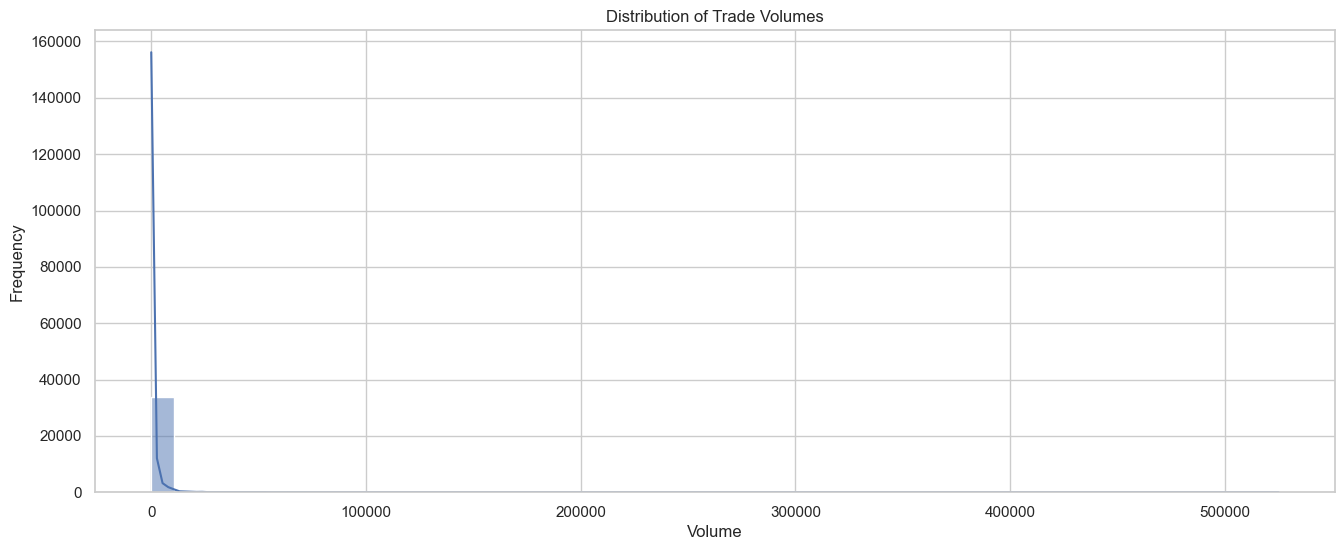

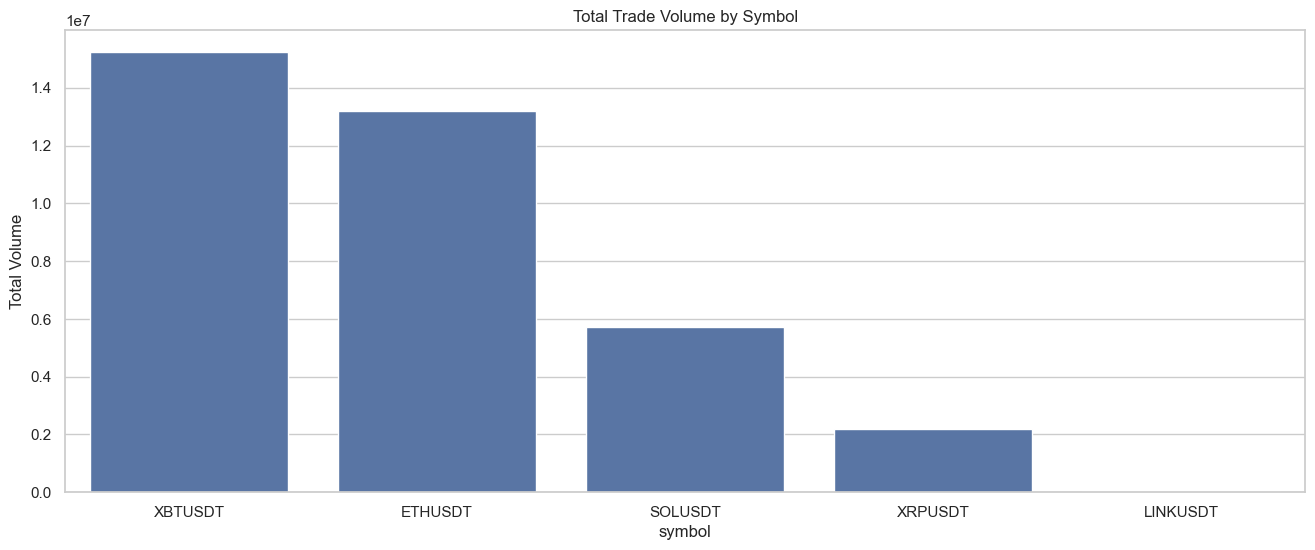

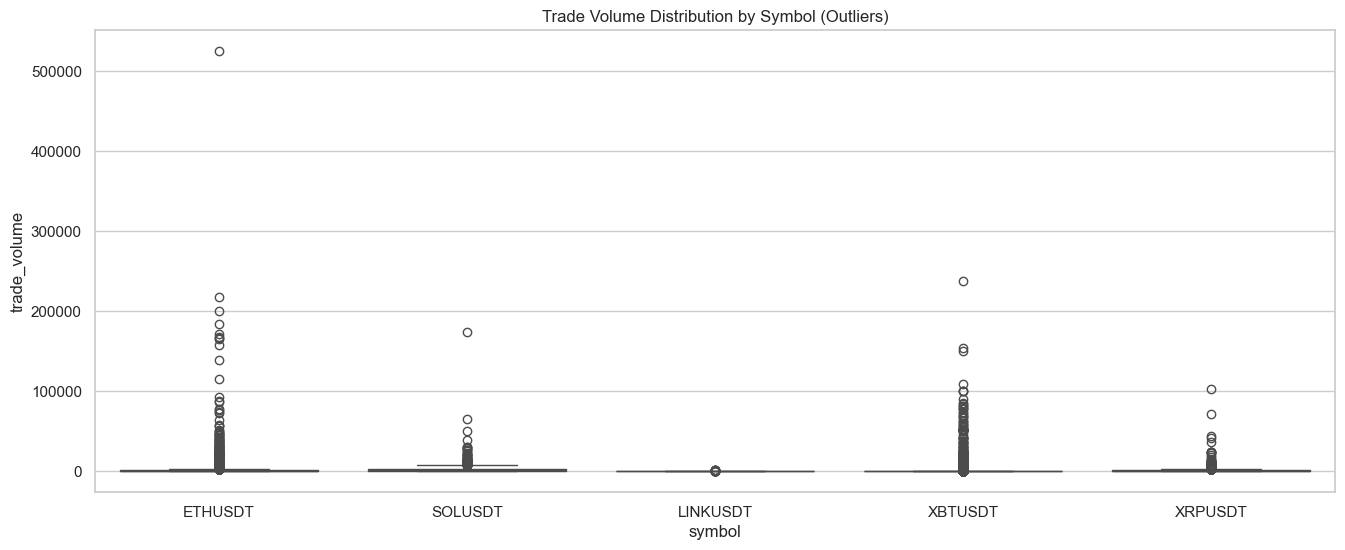

In [20]:
plt.figure()
sns.histplot(df['trade_volume'], bins=50, kde=True)
plt.title('Distribution of Trade Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

plt.figure()
volume_by_symbol = df.groupby('symbol')['trade_volume'].sum().sort_values(ascending=False)
sns.barplot(x=volume_by_symbol.index, y=volume_by_symbol.values)
plt.title('Total Trade Volume by Symbol')
plt.ylabel('Total Volume')
plt.show()

plt.figure()
sns.boxplot(x='symbol', y='trade_volume', data=df)
plt.title('Trade Volume Distribution by Symbol (Outliers)')
plt.show()

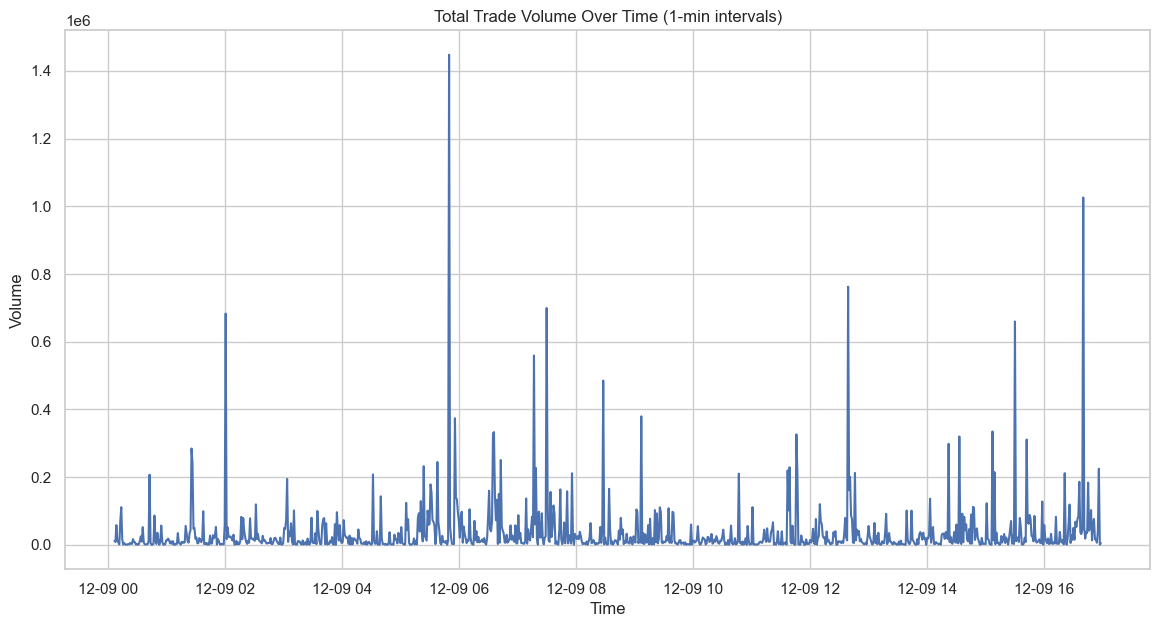

In [22]:
df_time = df.set_index('currenttimestamp')
df_resampled = df_time.resample('1min')['trade_volume'].sum()

plt.figure(figsize=(14, 7))
plt.plot(df_resampled.index, df_resampled.values)
plt.title('Total Trade Volume Over Time (1-min intervals)')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

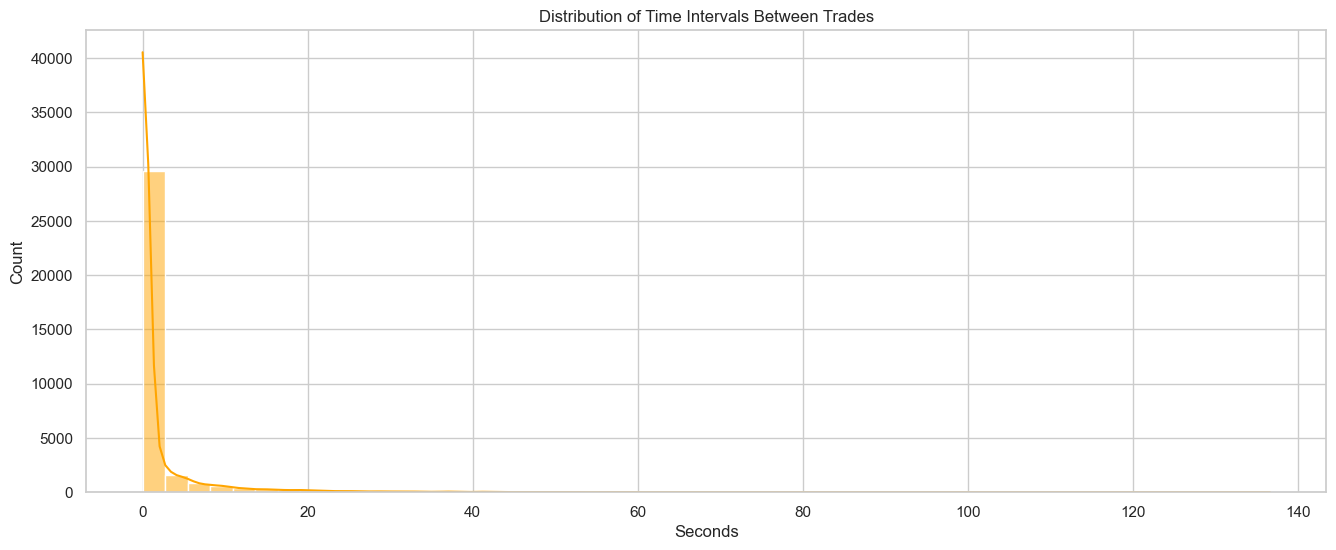

In [21]:
df['time_diff'] = df['currenttimestamp'].diff().dt.total_seconds()

plt.figure()
sns.histplot(df['time_diff'].dropna(), bins=50, kde=True, color='orange')
plt.title('Distribution of Time Intervals Between Trades')
plt.xlabel('Seconds')
plt.show()

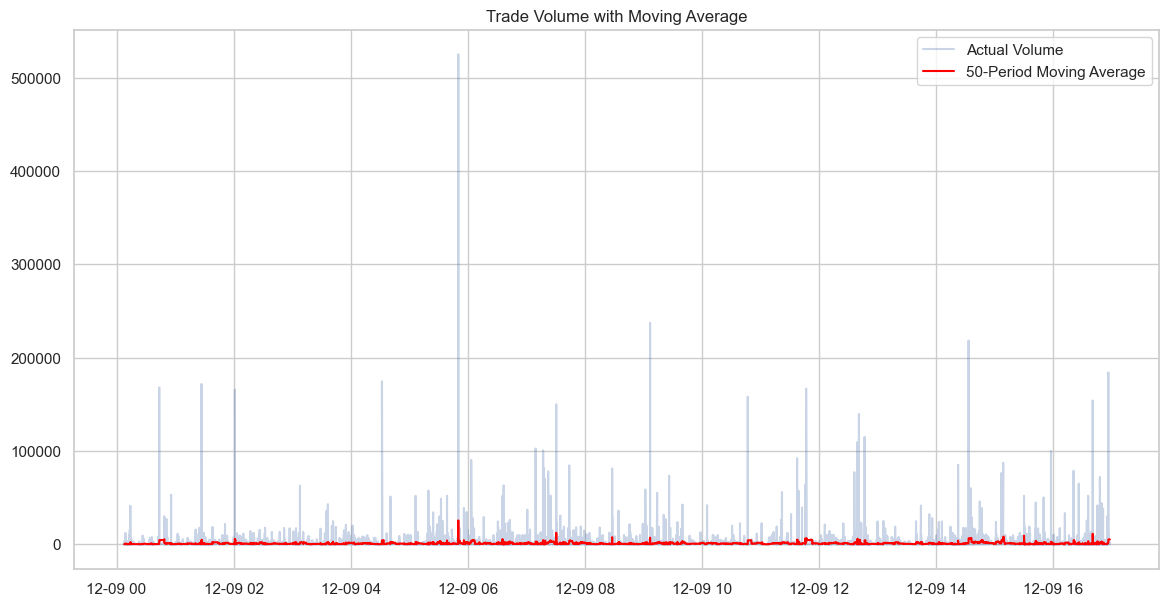

In [23]:
df['rolling_mean'] = df['trade_volume'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['currenttimestamp'], df['trade_volume'], label='Actual Volume', alpha=0.3)
plt.plot(df['currenttimestamp'], df['rolling_mean'], label='50-Period Moving Average', color='red')
plt.title('Trade Volume with Moving Average')
plt.legend()
plt.show()

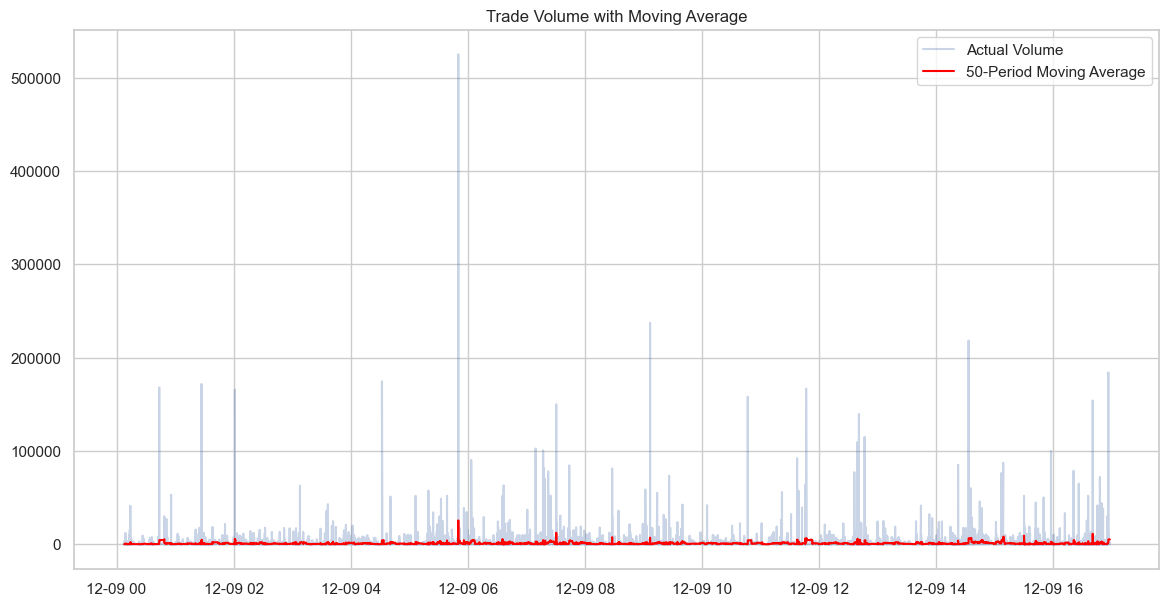

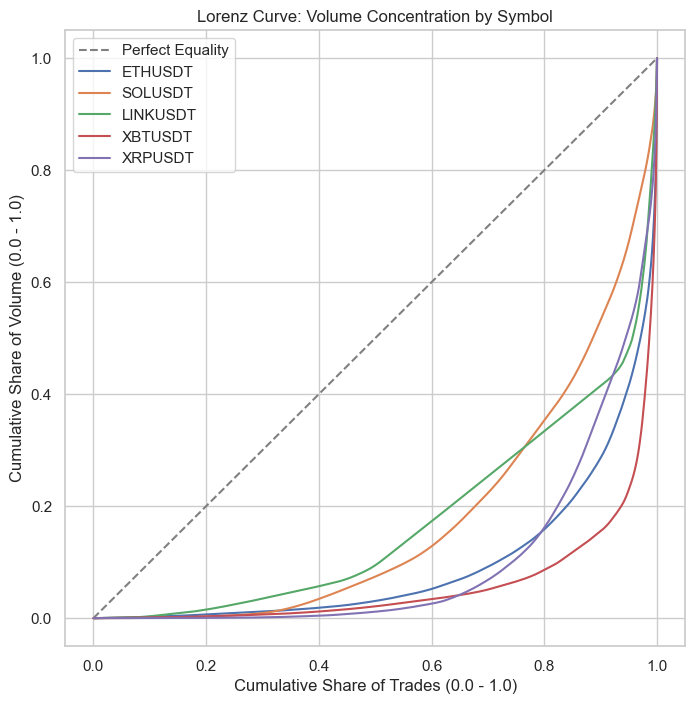

In [28]:
def plot_lorenz_curve(data, label):
    sorted_data = np.sort(data)
    cumulative_data = np.cumsum(sorted_data) / np.sum(sorted_data)
    cumulative_share = np.arange(1, len(cumulative_data) + 1) / len(cumulative_data)
    plt.plot(cumulative_share, cumulative_data, label=label)

plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Perfect Equality')

# Будуємо криві для кожного символу
for symbol in df['symbol'].unique():
    symbol_data = df[df['symbol'] == symbol]['trade_volume'].values
    plot_lorenz_curve(symbol_data, symbol)

plt.title('Lorenz Curve: Volume Concentration by Symbol')
plt.xlabel('Cumulative Share of Trades (0.0 - 1.0)')
plt.ylabel('Cumulative Share of Volume (0.0 - 1.0)')
plt.legend()
plt.show()

In [32]:
top_trades = df.nlargest(10, 'trade_volume')[['currenttimestamp', 'symbol', 'trade_volume', 'trade_id']]
print("--- Top 10 Whale Trades ---")
top_trades

--- Top 10 Whale Trades ---


,currenttimestamp,symbol,trade_volume,trade_id
10333,2025-12-09 05:50:25.636,ETHUSDT,525002.7380,00000000-006d-1000-0000-002607534e42
18804,2025-12-09 09:07:03.019,XBTUSDT,237239.1298,00000000-006d-1000-0000-002609da04da
27420,2025-12-09 14:33:37.162,ETHUSDT,218320.9875,00000000-006d-1000-0000-00260dbfb8d6
10362,2025-12-09 05:50:25.636,ETHUSDT,200302.2840,00000000-006d-1000-0000-002607534e99
34216,2025-12-09 16:56:53.490,ETHUSDT,184159.5944,00000000-006d-1000-0000-0026104deabf
7581,2025-12-09 04:32:08.947,SOLUSDT,174576.3568,00000000-006d-1000-0000-0026063c83c4
2190,2025-12-09 01:27:09.786,ETHUSDT,171807.8962,00000000-006d-1000-0000-00260398d704
995,2025-12-09 00:43:47.359,ETHUSDT,168206.9202,00000000-006d-1000-0000-0026030d3a18
22428,2025-12-09 11:47:03.784,ETHUSDT,166886.6304,00000000-006d-1000-0000-00260bb8262f
3215,2025-12-09 02:01:19.585,ETHUSDT,165589.6480,00000000-006d-1000-0000-002603fe7a11


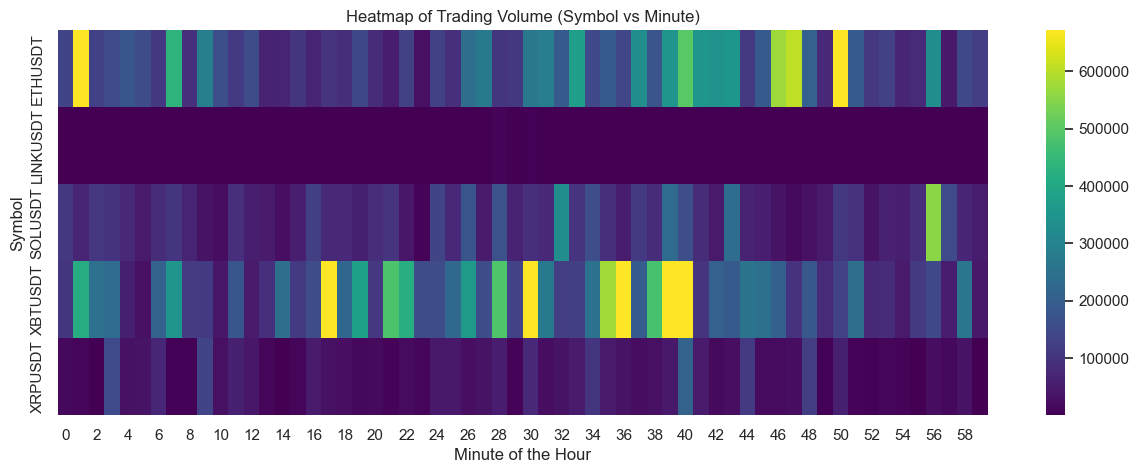

In [33]:
df['minute'] = df['currenttimestamp'].dt.minute
heatmap_data = df.pivot_table(index='symbol', columns='minute', values='trade_volume', aggfunc='sum', fill_value=0)

plt.figure(figsize=(15, 5))
sns.heatmap(heatmap_data, cmap="viridis", robust=True)
plt.title('Heatmap of Trading Volume (Symbol vs Minute)')
plt.xlabel('Minute of the Hour')
plt.ylabel('Symbol')
plt.show()

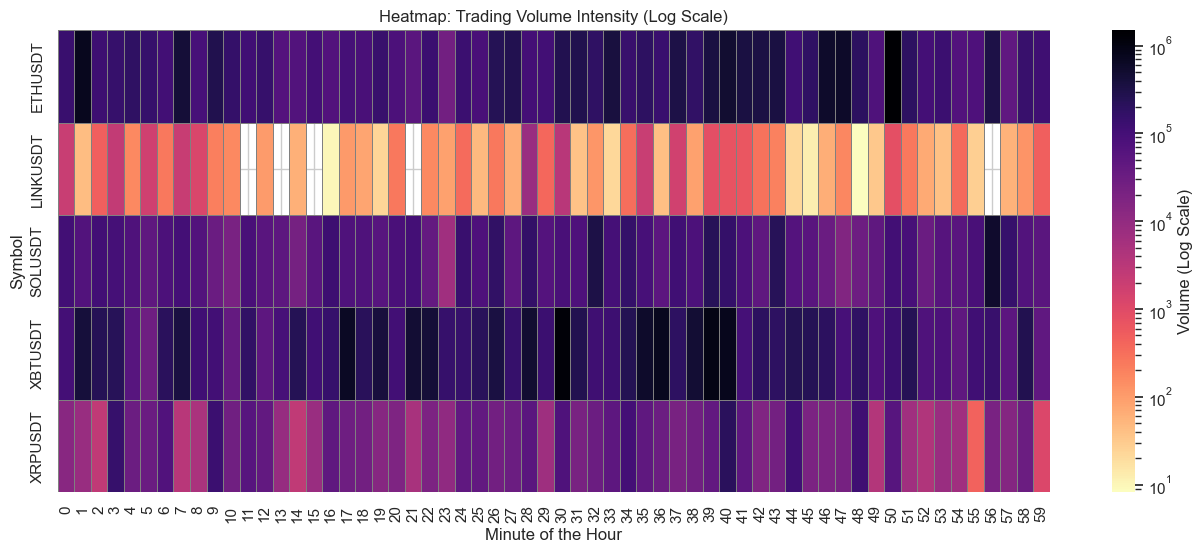

In [35]:
from matplotlib.colors import LogNorm

df['minute'] = df['currenttimestamp'].dt.minute
heatmap_data = df.pivot_table(index='symbol', columns='minute', values='trade_volume', aggfunc='sum', fill_value=0)

plt.figure(figsize=(16, 6))

# LogNorm дозволяє краще бачити структуру даних, коли є великий розкид значень
# cmap='magma_r' або 'YlGnBu' — контрастні палітри, кращі для сприйняття
sns.heatmap(heatmap_data,
            cmap="magma_r",
            norm=LogNorm(),  # Логарифмічна нормалізація
            linewidths=0.5,
            linecolor='gray',
            cbar_kws={'label': 'Volume (Log Scale)'})

plt.title('Heatmap: Trading Volume Intensity (Log Scale)')
plt.xlabel('Minute of the Hour')
plt.ylabel('Symbol')
plt.show()

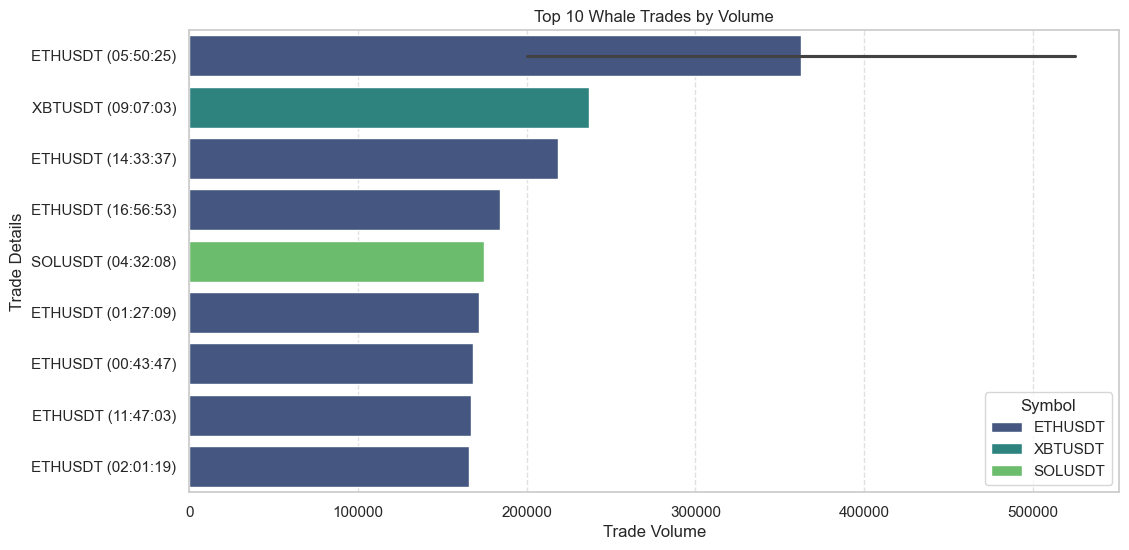

In [36]:
# Отримуємо топ-10 угод
top_trades = df.nlargest(10, 'trade_volume').copy()

# Створюємо читабельний підпис для осі Y (Символ + Час)
top_trades['label'] = top_trades['symbol'] + ' (' + top_trades['currenttimestamp'].dt.strftime('%H:%M:%S') + ')'

plt.figure(figsize=(12, 6))
sns.barplot(data=top_trades, x='trade_volume', y='label', hue='symbol', dodge=False, palette='viridis')

plt.title('Top 10 Whale Trades by Volume')
plt.xlabel('Trade Volume')
plt.ylabel('Trade Details')
plt.legend(title='Symbol')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [37]:
from scipy import stats

# 1. Визначаємо два найпопулярніші символи
top_2_symbols = df['symbol'].value_counts().nlargest(2).index.tolist()
sym1, sym2 = top_2_symbols[0], top_2_symbols[1]

# 2. Вибираємо дані
vol1 = df[df['symbol'] == sym1]['trade_volume']
vol2 = df[df['symbol'] == sym2]['trade_volume']

# 3. Проводимо тест Манна-Вітні
stat, p_value = stats.mannwhitneyu(vol1, vol2)

print(f"--- Hypothesis Test: {sym1} vs {sym2} ---")
print(f"Mean Volume {sym1}: {vol1.mean():.2f}")
print(f"Mean Volume {sym2}: {vol2.mean():.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Result: Статистично значуща різниця у розмірах угод (Reject H0)")
else:
    print("Result: Різниця випадкова, поведінка гравців схожа (Fail to reject H0)")

--- Hypothesis Test: XBTUSDT vs ETHUSDT ---
Mean Volume XBTUSDT: 692.98
Mean Volume ETHUSDT: 1809.22
P-value: 0.00000
Result: Статистично значуща різниця у розмірах угод (Reject H0)


--- Pareto Analysis ---
80% об'єму торгів формується лише 10.65% угод.


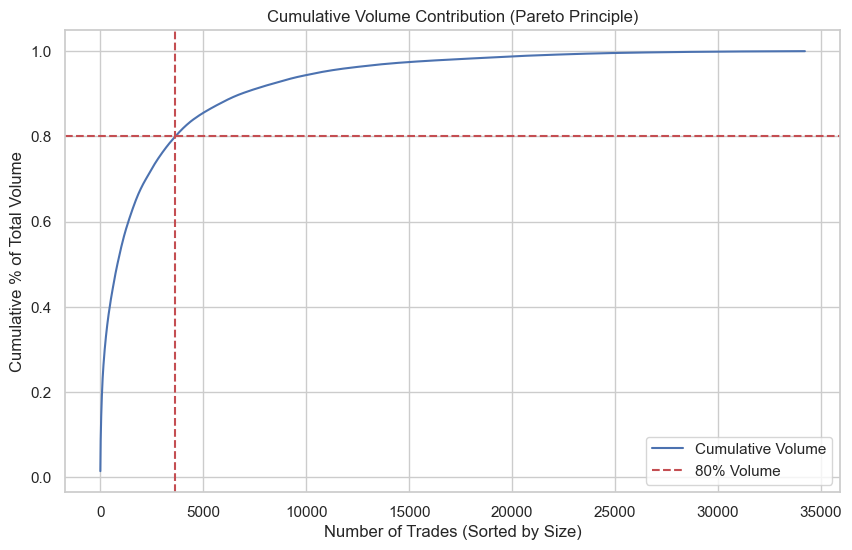

In [38]:
# Сортуємо всі угоди від найбільшої до найменшої
sorted_vols = df['trade_volume'].sort_values(ascending=False).values
total_vol = sorted_vols.sum()
cumulative_vol = sorted_vols.cumsum() / total_vol

# Знаходимо індекс, де перетинається поріг 80%
pareto_idx = next(x[0] for x in enumerate(cumulative_vol) if x[1] > 0.8)
pareto_percent = (pareto_idx / len(df)) * 100

print(f"--- Pareto Analysis ---")
print(f"80% об'єму торгів формується лише {pareto_percent:.2f}% угод.")

plt.figure(figsize=(10, 6))
plt.plot(range(len(cumulative_vol)), cumulative_vol, label='Cumulative Volume')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Volume')
plt.axvline(x=pareto_idx, color='r', linestyle='--')
plt.title('Cumulative Volume Contribution (Pareto Principle)')
plt.xlabel('Number of Trades (Sorted by Size)')
plt.ylabel('Cumulative % of Total Volume')
plt.legend()
plt.grid(True)
plt.show()